In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline

### Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [6]:
for i in range(0, 10):
    n = 0
    for j in range(0, 10):
        if i != j:
            x1 = raitings[i]
            x2 = raitings[j]

            cos = np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))
            
            if cos > n:
                n = cos
                user = j + 1
            

    print(f'({i+1}, {user})')

(1, 9)
(2, 5)
(3, 10)
(4, 10)
(5, 9)
(6, 10)
(7, 4)
(8, 6)
(9, 1)
(10, 3)


b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
raitingsPCA = pca.fit_transform(raitings)
raitingsPCA

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

### Задание 2
Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

In [22]:
from sympy import *
from scipy.misc import derivative


In [23]:
x = symbols('x')

In [24]:
def f(x):
    return (tan(sin(x) + cos(2*x+3)))**2

derivative(f, 1.0, dx=1e-6)

55.3859176433136

In [25]:
diff(tan(sin(x) + cos(2*x+3)**2))

(-4*sin(2*x + 3)*cos(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3)**2)**2 + 1)

### Задание 3
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error

In [26]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [28]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [29]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

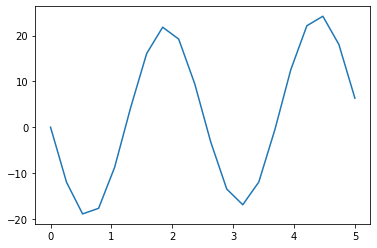

In [30]:
plt.plot(x, fx)
plt.show()

In [31]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [38]:
res = minimize(error, (-1,0), method='COBYLA')
print(res)

     fun: 0.07203835682314086
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 168
  status: 1
 success: True
       x: array([ 3.00000377, -2.4998895 ])


In [39]:
params = (3.00000377, -2.4998895)
error(params)

0.07203815082295684

### Задание 4
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

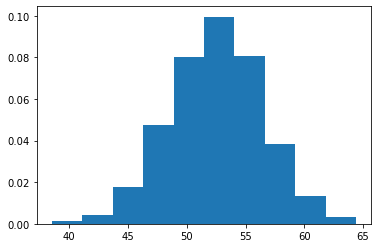

In [69]:
from numpy.random import choice

n = np.random.randint(low=1, high=100, size=20)
nn = choice(n, size=(1000, 50))
nnn = nn.mean(axis=1)

plt.hist(nnn, density=True)
plt.show()


### Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

In [33]:
m = np.array([[1, 4],
[1, 1]])
print(m)

[[1 4]
 [1 1]]


In [34]:
w, v = np.linalg.eig(m)

In [35]:
w

array([ 3., -1.])

In [36]:
v

array([[ 0.89442719, -0.89442719],
       [ 0.4472136 ,  0.4472136 ]])

In [37]:
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[i]))

Собственное значение 3.0000000000000004
соответствующий ему собственный вектор [ 0.89442719 -0.89442719]
Собственное значение -0.9999999999999996
соответствующий ему собственный вектор [0.4472136 0.4472136]


[1-l, 4]

[1, 1-l] 

l^2 - 2 * l - 3=0

D = 2^2 -4 * -3 = 16 = 4

x1 = -2+4/2 =-1

x2 = -2-4/2 =3